# 03 - Exploratory Data Analysis of Bird Migration Routes

# Task 01: Import the necessary python libraries

Apply the magic command of matplotlib to have inline figures. 

In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Task 02: Load the data and get a first impression about the dataset


In [5]:
filepath = 'BirdMigrationRoutes.csv'

print(filepath)

BirdMigrationRoutes.csv


In [6]:
df_bird = pd.read_csv(filepath)

 **info()**, **describe()**, **head()**, and **tail()** 

In [5]:
df_bird.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   altitude            61920 non-null  int64  
 1   date_time           61920 non-null  object 
 2   device_info_serial  61920 non-null  int64  
 3   direction           61477 non-null  float64
 4   latitude            61920 non-null  float64
 5   longitude           61920 non-null  float64
 6   speed_2d            61477 non-null  float64
 7   bird_name           61920 non-null  object 
dtypes: float64(4), int64(2), object(2)
memory usage: 3.8+ MB


# Task 03: Extract the unique values in a column


In [6]:
df_bird['bird_name'].unique()

array(['Eric', 'Nico', 'Sanne'], dtype=object)

In [7]:
len(df_bird['altitude'])

61920

# Task 04: Basic plotting with *matplotlib*


In [8]:
eric = df_bird['bird_name']=="Eric"
eric


0         True
1         True
2         True
3         True
4         True
         ...  
61915    False
61916    False
61917    False
61918    False
61919    False
Name: bird_name, Length: 61920, dtype: bool

In [9]:
x= df_bird['longitude'][eric]
y = df_bird['latitude'][eric]
len(eric)

61920

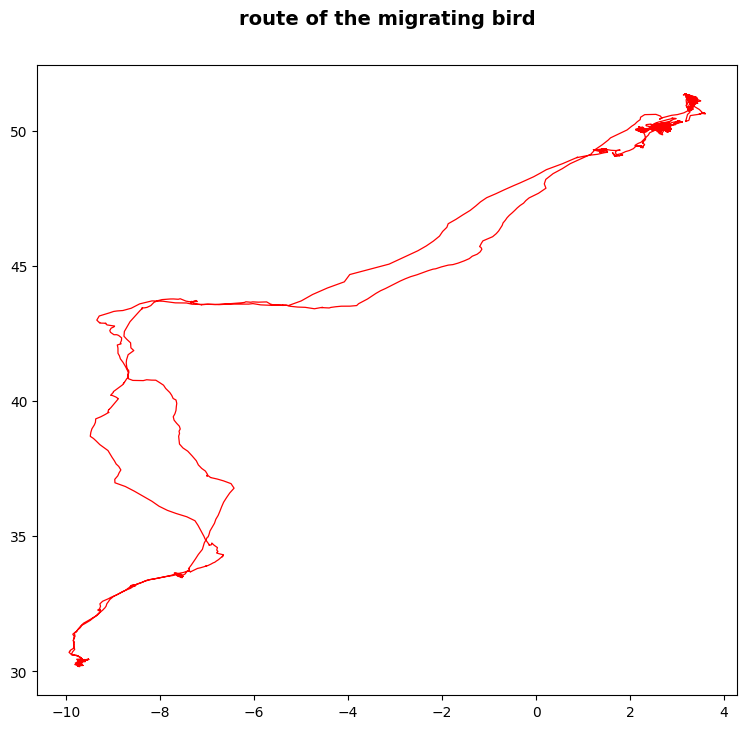

In [10]:
fig = plt.figure(figsize=(7,7))
fig.suptitle("route of the migrating bird",fontsize =14, fontweight = 'semibold')
ax = fig.add_axes((0,0,1,.9))
ax.plot(x,y,c = 'r',linewidth=.9)

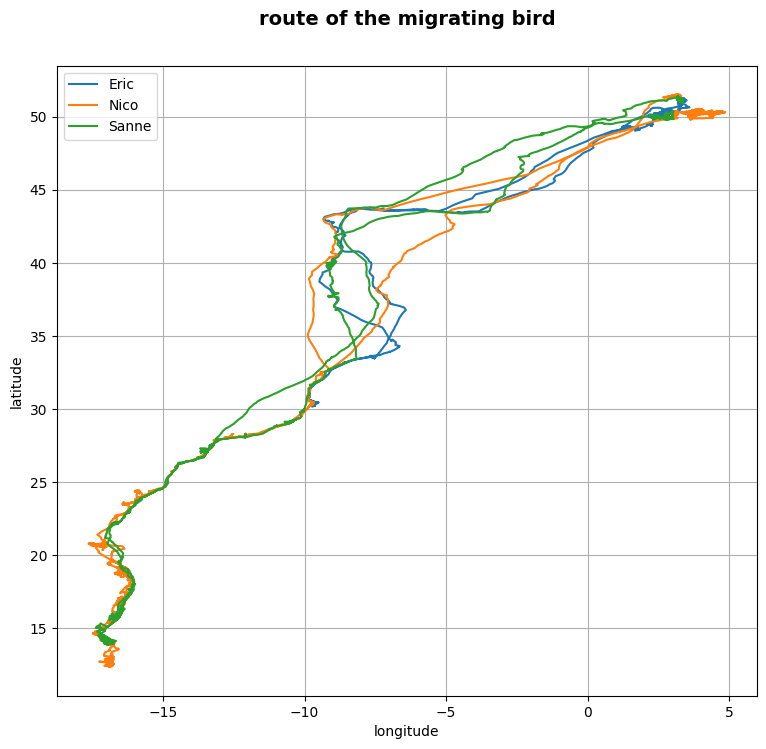

In [11]:
fig = plt.figure(figsize=(7,7))
fig.suptitle("route of the migrating bird",fontsize =14, fontweight = 'semibold')
ax = fig.add_axes((0,0,1,.9))
for i,t in enumerate(df_bird['bird_name'].unique()):
    idx= df_bird['bird_name']== t
    x=df_bird['longitude'][idx]
    y=df_bird['latitude'][idx]
    ax.plot(x,y,label =t)
ax.legend(loc='best')
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.grid(True)
plt.show()


# Task 05: Examine bird speed

Text(0, 0.5, 'Speed')

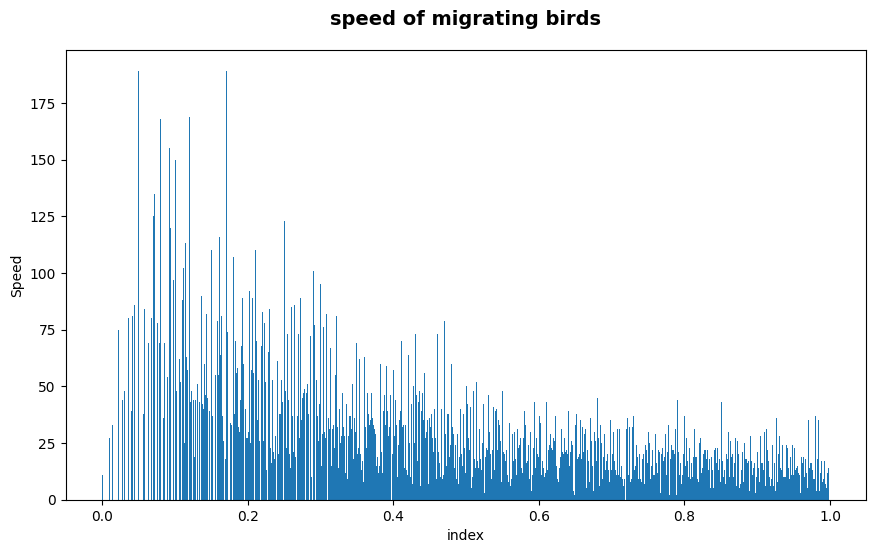

In [12]:
speed = df_bird['speed_2d']
fig=plt.figure(figsize=(8,5))
fig.suptitle('speed of migrating birds', fontsize=14,fontweight ='semibold')
ax = fig.add_axes((0,0,1,0.9))
bins = np.arange(0.0,1.0,0.001)
ax.hist(speed,bins = bins)
ax.set_xlabel('index')
ax.set_ylabel('Speed')


In [13]:
speed.max()

63.4880658076776

In [14]:
speed.loc[215:223]

215    0.425441
216    0.144222
217    0.509608
218    0.786003
219         NaN
220    0.528110
221    1.167776
222    0.334215
223    1.853106
Name: speed_2d, dtype: float64

In [15]:
np.isnan(speed)

0        False
1        False
2        False
3        False
4        False
         ...  
61915    False
61916    False
61917    False
61918    False
61919    False
Name: speed_2d, Length: 61920, dtype: bool

And since all values in the first and last few rows are ok, apply **isnan()** also on the slice we defined earlier between 215 and 223.

In [16]:
np.isnan(speed.loc[215:223])

215    False
216    False
217    False
218    False
219     True
220    False
221    False
222    False
223    False
Name: speed_2d, dtype: bool

For a more concise (and 1 value) answer, apply the function **np.any()** on the result of **isnan()**, so that the output is either true or false, depending if any row value contained NaN or not.

In [17]:
np.any(np.isnan(speed))

True

A related function is **np.all()**, which we can use to check if all values are NaN.

In [18]:
np.all(np.isnan(speed))

False

In [19]:
np.sum(np.isnan(speed))

443

- Find (with isnan) the NaN values in the array **speed** and assign the output to a variable idx.
- Check the type of the values in speed a the indices idx by printing the indexed result array. All values should be NaN.

In [20]:
np.where(np.isnan(speed))

(array([  219,  1005,  1231,  1254,  1530,  1730,  2469,  3218,  3405,
         3412,  3429,  3435,  3596,  3616,  3637,  3736,  3741,  4047,
         4066,  4118,  4147,  4355,  4512,  4592,  4687,  4777,  4927,
         4982,  5008,  5025,  5115,  5156,  5734,  5743,  5902,  6001,
         6570,  6663,  6932,  6972,  7429,  7596,  8179,  8932,  9201,
         9324,  9356,  9425,  9592, 10106, 10142, 10152, 10162, 10552,
        10941, 10943, 11320, 12617, 12761, 13095, 13181, 13283, 14109,
        14475, 14997, 15031, 15104, 15579, 15774, 15811, 15909, 16783,
        16975, 17945, 18233, 18314, 19193, 19516, 19525, 19545, 19620,
        19621, 19753, 19771, 19778, 19811, 20639, 20914, 21922, 22063,
        22072, 22334, 22586, 22711, 22781, 22884, 22999, 23287, 23682,
        23719, 24341, 24409, 24747, 24799, 24873, 25063, 25667, 25682,
        25712, 25997, 26007, 26055, 26668, 27579, 27748, 28190, 28274,
        28546, 28824, 28825, 29398, 30242, 30435, 30707, 30783, 31077,
      

In [21]:
~np.isnan(speed)

0        True
1        True
2        True
3        True
4        True
         ... 
61915    True
61916    True
61917    True
61918    True
61919    True
Name: speed_2d, Length: 61920, dtype: bool

Text(0, 0.5, 'Frequency')

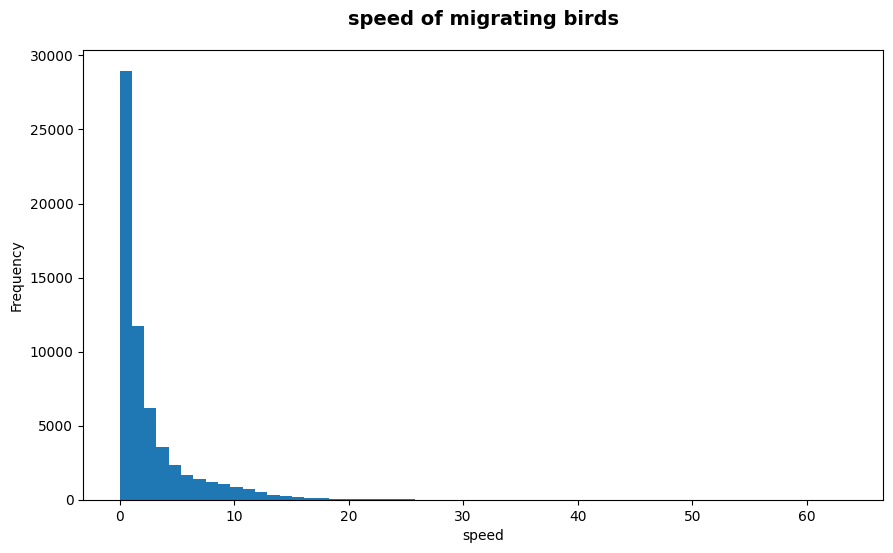

In [22]:
nspeed = speed[~np.isnan(speed)]
fig=plt.figure(figsize=(8,5))
fig.suptitle('speed of migrating birds', fontsize=14,fontweight ='semibold')
ax = fig.add_axes((0,0,1,0.9))
bins = np.linspace(speed.min(), speed.max(), 60)
ax.hist(nspeed,bins = bins)
ax.set_xlabel('speed')
ax.set_ylabel('Frequency')

# Task 06: Plotting with pandas

<Axes: >

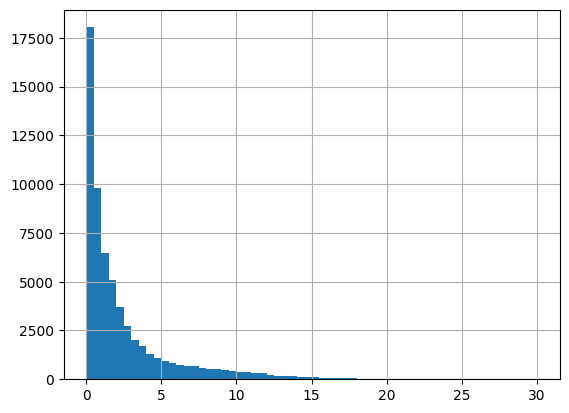

In [23]:
speed[~np.isnan(speed)].hist(range =[0,30],bins=60)

*What impression do you get about the distribution of speed data?*

# Short introduction to cartopy

area defined by the **set_extent()** method.

# Task 07: Plot data with Cartopy using a cartographic projection

1.) Setting up the figure
- Import the cartopy module and cartopy.crs class as ccrs (a cartopy class that implements coordinate reference systems).
- Import the class cartopy.feature as cfeature.
- Use the ccrs module to create a projection object named **proj** of type Mercator projection (The constructor is simply called **Mercator()** and no arguments are needed.)
- Create a figure object using matplotlib of size (10, 10).
- Create an axes object and pass as argument the rectangle parameters and the projection object **proj** (constructed in step 2) as the **projection** parameter.
- Set the extend of your axes with the method **set_extent()** to (-25.0, 20.0, 52.0, 10.0) as first argument.
- Use the **add_feature()** method on your axes object and add some geographic features to your map. You simply call the method with the above mentioned feature constants (like BORDERS) as the only argument. Note that these constants must be prefixed with **cfeature.** like **cfeature.LAND**. For BORDERS, also add the argument **linestyle =':'** to have dashed country borders.

2.) Plot the trajectories of the birds. (Your code will be very similar to the plot code you have written above.)

- Loop over all of our bird names
- Extract the rows from the DataFrame to correspond to that particular bird
- Extract the longitude and latitude in variables x and y
- Provide to the **plot()** method the additional argument **transform = ccrs.Geodetic()**.
- Add a legend to your plot.

In [30]:
pip shapely

Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "shapely"



In [28]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# Create a Mercator projection object
proj = ccrs.Mercator()

# Create a figure object with size 10x10
fig = plt.figure(figsize=(10, 10))

# Create an axes object and pass in the projection object
ax = fig.add_axes((0,0,1,.9),projection=proj)

# Set the extent of the axes
ax.set_extent([-25.0, 20.0, 52.0, 10.0], crs=ccrs.PlateCarree())

# Add geographic features to the map
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')



fig.suptitle("route of the migrating bird",fontsize =14, fontweight = 'semibold')
# ax = fig.add_axes((0,0,1,.9))
for i,t in enumerate(df_bird['bird_name'].unique()):
    idx= df_bird['bird_name']== t
    x=df_bird['longitude'][idx]
    y=df_bird['latitude'][idx]
    ax.plot(x,y,label =t,transform = ccrs.Geodetic())
ax.legend(loc='best')
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.grid(True)
# Show the map
plt.show()

ModuleNotFoundError: No module named 'cartopy'

# Task 08: Deal with timestamps


In [ ]:
import datetime

In [ ]:
t1 = datetime.datetime.today()

In [ ]:
t2 = datetime.datetime.today()

In [ ]:
t1-t2

In [ ]:
df_bird['date_time']


The second field contains a value '+00' that is always 0 and is not really necessary. It is the UTC offset expressed in hours. Take the string of one row of the date time column and strip this offset away. Use slicing. YOu will need to do this later for converting the string to a datetime object.

In [ ]:
df_bird['date_time'][0][0:19]

In [ ]:
datetime.datetime.strptime(df_bird['date_time'][0][0:19], '%Y-%m-%d %H:%M:%S')

Use this function (**strptime()**) to go over each row in our data set (with a for loop), and create a new **datetime** object corresponding to every single row. You can follow these steps:
- Set up an empty Python list, called e.g. timestamps. (List are defined with brackets **[]**.)
- Loop over every single row in the birds data set.
- For every single row, extract the date time, ignoring the last three characters (using slicing).
- Append the resulting object to the timestamps list (with the method **append()** of the class list).

In [ ]:
len(df_bird)

In [ ]:
timestamps = []
for index, row in df_bird.iterrows():
    date_time_obj = datetime.datetime.strptime(df_bird['date_time'][index][0:19], '%Y-%m-%d %H:%M:%S')
    timestamps.append(date_time_obj)
timestamps[2]

In [ ]:
timestamps[1] - timestamps[0]

In [ ]:
timestamps_series = pd.Series(timestamps, index=df_bird.index)

In [ ]:
timestamps_series.head()

In [ ]:
timestamps_series[4] - timestamps_series[3]

Try the same with the original date_time column (and you will encounter an error, because the difference between two strings is not defined).

In [ ]:
df_bird['date_time'][0][0:19] - df_bird['date_time'][1][0:19]

In [ ]:
print(len(timestamps_series))
print(timestamps_series[1]- timestamps_series[0])

In [ ]:
elapsed_time = []
eric_times = timestamps_series[eric]
initial = timestamps_series[eric][0]
for idx,row in enumerate(eric_times):
    t=eric_times[idx]-initial
    elapsed_time.append(t)
len(elapsed_time)


In [ ]:
elapsed_series_eric = pd.Series(elapsed_time, index=eric.index)

Check another time difference of the new list, maybe at index 1000.

In [ ]:
print(elapsed_time[1000])

In [ ]:
datetime.timedelta(days=1)

In [ ]:
elapsed_time[1000]/datetime.timedelta(days=1)

In [ ]:
elapsed_days  = np.array(elapsed_time)/datetime.timedelta(days=1)

In [ ]:
print(len(elapsed_days))

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(8,5))
fig.suptitle('Elapsed Days', fontsize =14, fontweight = 'semibold')
ax = fig.add_axes((0,0,.5,.9))
ax.plot(elapsed_days)

ax.set_xlabel('observation')
ax.set_ylabel('days')

In [ ]:
speed_eric= df_bird['speed_2d'][eric]

In [ ]:
np.where(np.isnan(speed_eric))

In [ ]:
speed_eric_2d = speed_eric[~np.isnan(speed_eric)]
days_eric = elapsed_days[~np.isnan(speed_eric)]
speed_eric_2d

In [ ]:
days_eric[0:99]

In [ ]:
np.floor(days_eric)

In [ ]:
unique_values, indices, counts = np.unique(np.floor(days_eric), return_index=True, return_counts=True)
counts

In [ ]:
np.add.reduceat(np.array(speed_eric_2d),indices)

In [ ]:
np.add.reduceat(np.array(speed_eric_2d),indices)/counts

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(10,10))
fig.suptitle('AVerage Speed per Day', fontsize =14, fontweight = 'semibold')
ax = fig.add_axes((0,0,1,.9))
ax.plot(np.add.reduceat(np.array(speed_eric_2d),indices)/counts)
ax.set_xlabel('Day')
ax.set_ylabel('Mean Speed')

*What could indicate the two spikes visible on the plot?*

# Task 09: Look for flight patterns

In [ ]:
df_bird.groupby(['bird_name']).mean()

In [ ]:
df_bird.groupby(['bird_name'])['speed_2d'].mean()

In [ ]:
df_bird.groupby(['bird_name'])['altitude'].max()

In [ ]:
df_bird.groupby(['bird_name'])['speed_2d'].max()